In [1]:
import numpy as np
import pandas as pd

In [2]:
# convertir le fichier excel en fichier csv
df = pd.read_excel('all_data.xlsx')
df.to_csv('raw_data.csv', index=False)

In [3]:
df.head()

,conso_elect,gender,age_category,marital_status,household_size,number_room,area_Hs,type_accomodation,no_appliances,percen_bill
0,less than 110 kWh,male,25 - 34,single,1,7,91 - 120,apartment,6,less than 5%
1,less than 110 kWh,male,45 - 54,single,7,3,20 - 50,studio,5,less than 5%
2,less than 110 kWh,female,less than 25,single,1,2,less than 20,room,7,less than 5%
3,less than 110 kWh,male,25 - 34,single,2,1,less than 20,room,2,less than 5%
4,110 - 400 kWh,male,25 - 34,single,5,5,51 - 90,apartment,8,5 - 10%


In [19]:
def delete_spaces(row):
   return row.rstrip()

In [20]:
df["conso_elect"] = df["conso_elect"].apply(delete_spaces)

In [21]:
df['type_accomodation'] = df['type_accomodation'].apply(delete_spaces)

In [4]:
df.shape

(749, 10)

In [5]:
df.conso_elect.value_counts()

,count
conso_elect,
less than 110 kWh,437
110 - 400 kWh,300
401 - 800 kWh,11
801 - 2000 kWh,1


<ipython-input-32-b73365f95d7c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-b73365f95d7c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-b73365f95d7c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-b73365f95d7c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-b73365f95d7c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-b73365f95d7c>:48: UserWarning: FixedFormatter should only be used together with FixedLo

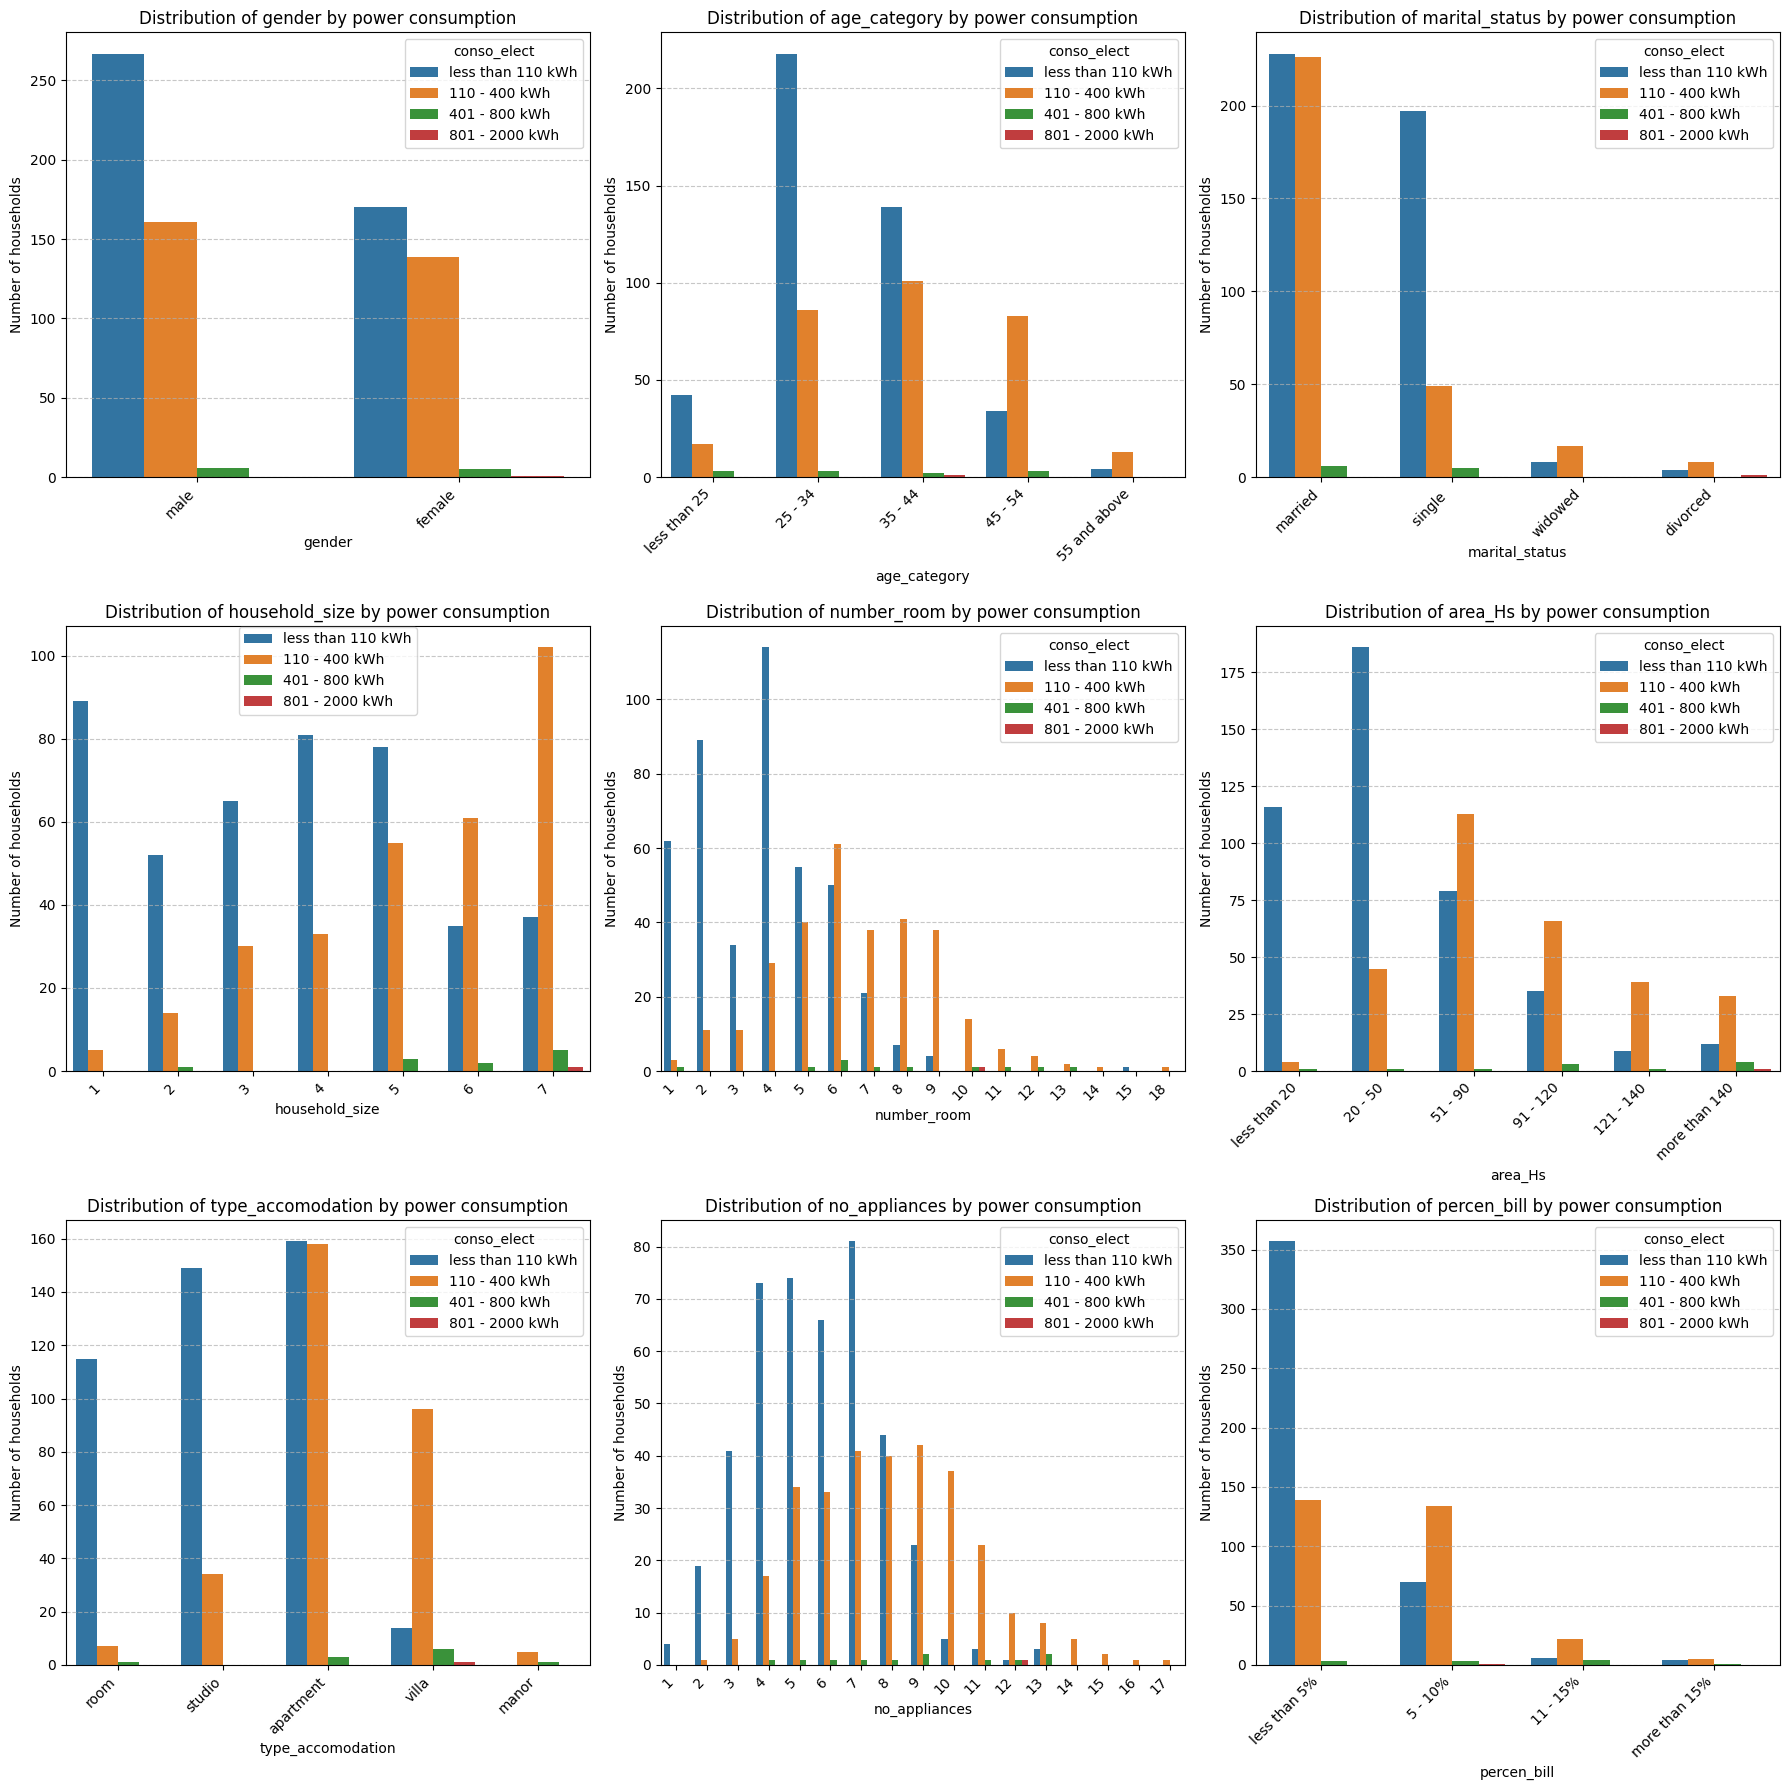

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Supposons que df est votre dataframe
features = [col for col in df.columns if col != 'conso_elect']
age_order = ['less than 25', '25 - 34', '35 - 44', '45 - 54', '55 and above']
area_order = ['less than 20', '20 - 50', '51 - 90', '91 - 120', '121 - 140', 'more than 140']
type_accomodation_order = ['room', 'studio', 'apartment', 'villa', 'manor']

# Définir le nombre de graphiques par rangée
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Aplatir le tableau d'axes pour un accès plus facile

# Créer un dossier pour les fichiers exportés si nécessaire
output_dir = "other_graphics"
os.makedirs(output_dir, exist_ok=True)

for i, feature in enumerate(features):
    ax = axes[i]

    if feature == 'age_category':
        order = age_order
    elif feature == 'area_Hs':
        order = area_order
    elif feature == 'type_accomodation':
        order = type_accomodation_order
    elif df[feature].dtype == 'object' or df[feature].dtype.name == 'category':
        order = df[feature].value_counts().index
    else:
        order = None

    sns.countplot(data=df, x=feature, hue='conso_elect', order=order, ax=ax)

    ax.set_title(f'Distribution of {feature} by power consumption')
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of households')

    if feature == 'household_size':
        ax.legend(loc='center', bbox_to_anchor=(0.5, 0.9))

    # Rotation des étiquettes si nécessaire
    if len(df[feature].unique()) > 5 or df[feature].dtype == 'object':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Ajout de la grille
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Sauvegarder les graphiques en SVG et JPEG
    filename = os.path.join(output_dir, f"{feature}_distribution")
    plt.savefig(f"{filename}.svg", format="svg", dpi=300)
    plt.savefig(f"{filename}.png", format="png", dpi=300)

# Supprimer les sous-graphiques inutilisés si le nombre de features n'est pas un multiple de n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster la disposition
plt.tight_layout()

# Afficher tous les graphiques
plt.show()


In [23]:
df['type_accomodation'].unique()[0]

'apartment'